In [10]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

outputdir = "/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/master_plots/14_sst_dry_adiabatic/"

ds_theta_v4 = xr.open_dataset("/home/qwertz/obs_data_MA/iqq_foghat/theta_v_spec_hum_iqq_22_23apschera20240304.nc")
old_controle = "/home/qwertz/UCLA/uclales/Runs/CONTROLE_RUN (another copy)/"
sst_minus00 = "/home/qwertz/UCLA/uclales/Runs/00_SST_MINUS/"
sst_plus00 = "/home/qwertz/UCLA/uclales/Runs/00_SST_PLUS/"
ccn_plus00 ="/home/qwertz/UCLA/uclales/Runs/00_CCN_PLUS/"
ccn_minus00 ="/home/qwertz/UCLA/uclales/Runs/00_CCN_MINUS/"
grid5_00 = "/home/qwertz/UCLA/uclales/Runs/00_GRID_DZ5/"
grid_icon_00 ="/home/qwertz/UCLA/uclales/Runs/00_GRID_ICONLES/"
file_icon = "/home/qwertz/data_js_icon_22_23_August_2018/stat_IQQ_all-times.nc"
file2 = "/home/qwertz/obs_data_MA/iqq_foghat/22/sups_iqq_mwr00_l2_clwvi_p00_20180822000000.nc"
cloudnet_path = "/home/qwertz/obs_data_MA/iqq_cloudnet/"
files = ["20180822_iquique_classification.nc","20180823_iquique_classification.nc",\
         "20180822_iquique_halo-doppler-lidar_BL-classification.nc", "20180823_iquique_halo-doppler-lidar_BL-classification.nc",\
         "20180822_iquique_halo-doppler-lidar_cloud.nc", "20180823_iquique_halo-doppler-lidar_cloud.nc",\
         "20180822_iquique_lwc-adiabatic-method.nc", "20180823_iquique_lwc-adiabatic-method.nc"]

##################################################

controle_psds = xr.open_dataset(old_controle+"rf01.ps.nc")#.sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
sstplus_psds =xr.open_dataset(sst_plus00+"rf01.ps.nc")#.sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
sst_minus_psds = xr.open_dataset(sst_minus00+"rf01.ps.nc")#.sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
ds_icon = xr.open_dataset(file_icon)
ds_ccn_minus = xr.open_dataset(ccn_minus00+"rf01.ps.nc")#.sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
ds_ccn_plus = xr.open_dataset(ccn_plus00+"rf01.ps.nc")#.sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
grid5_00_psds = xr.open_dataset(grid5_00+"rf01.ps.nc")#.sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))
grid_icon_00_psds = xr.open_dataset(grid_icon_00+"rf01.ps.nc")#.sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))

print(controle_psds["t"])
print(ds_theta_v4["theta_l"])
print(ds_icon["theta_v"].values[0:10])
print(ds_icon["height"].values[0:10])
print(ds_icon.data_vars)

<xarray.DataArray 't' (time: 289, zt: 180)> Size: 208kB
[52020 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-01-01 ... 2000-01-02
  * zt       (zt) float32 720B -5.0 5.0 15.0 ... 1.962e+03 1.98e+03 1.998e+03
Attributes:
    longname:  Liquid Water Potential temperature
    units:     K
<xarray.DataArray 'theta_l' (time: 181, height: 43)> Size: 62kB
[7783 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1kB 2018-08-22T00:02:43.000001024 ... 2018...
  * height   (height) float32 172B 0.0 50.0 100.0 150.0 ... 9e+03 9.5e+03 1e+04
[[[504.8655 ]
  [493.02567]
  [483.46616]
  ...
  [287.82895]
  [287.92288]
  [288.6067 ]]

 [[505.16818]
  [493.379  ]
  [483.746  ]
  ...
  [288.09262]
  [288.31958]
  [288.89758]]

 [[505.45053]
  [493.74164]
  [484.02634]
  ...
  [287.96457]
  [288.16116]
  [288.65643]]

 ...

 [[506.80362]
  [495.77228]
  [485.90143]
  ...
  [287.7359 ]
  [287.83972]
  [288.09802]]

 [[506.9329 ]
  [495.9563 ]
  

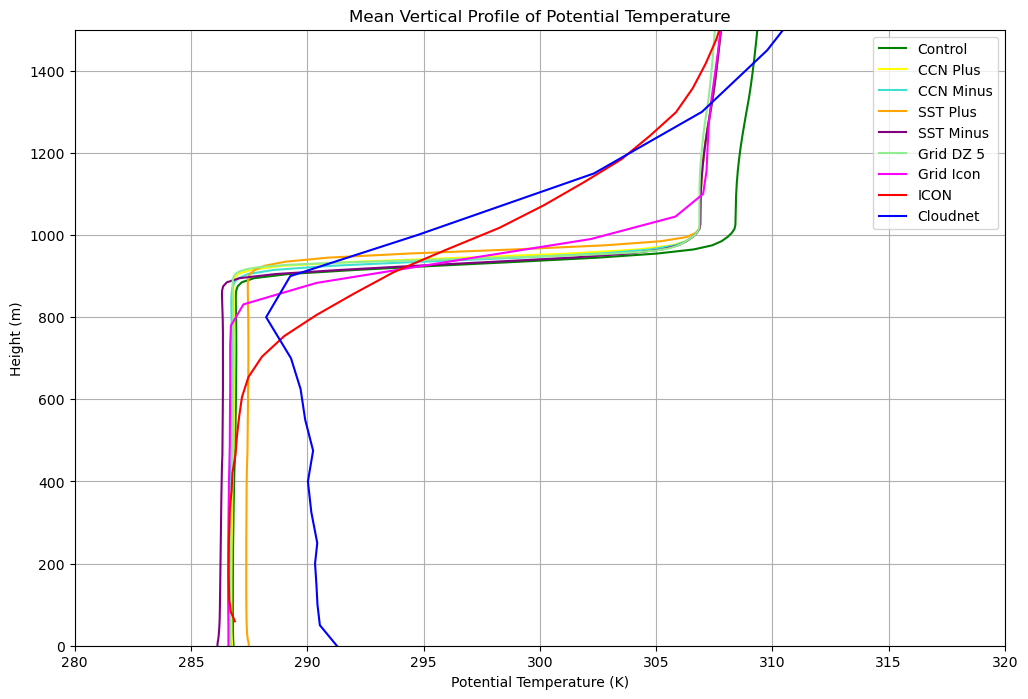

In [22]:
# Mittlere Profile der potentiellen Temperatur berechnen
def mean_profile(ds, var_name):
    return ds[var_name].mean(dim='time')

profiles = {
    'Control': mean_profile(controle_psds, 't'),
    'CCN Plus': mean_profile(ds_ccn_plus, 't'),
    'CCN Minus': mean_profile(ds_ccn_minus, 't'),
    'SST Plus': mean_profile(sstplus_psds, 't'),
    'SST Minus': mean_profile(sst_minus_psds, 't'),
    'Grid DZ 5': mean_profile(grid5_00_psds, 't'),
    'Grid Icon': mean_profile(grid_icon_00_psds, 't'),
    'ICON': mean_profile(ds_icon.isel(ncells=0), 'theta_v'),
    'Cloudnet': mean_profile(ds_theta_v4, 'theta_l')
}

# Farben für die verschiedenen Läufe
colors = {
    'Control': "green",
    'CCN Plus': "yellow",
    'CCN Minus': "turquoise",
    'SST Plus': "orange",
    'SST Minus': "purple",
    'Grid DZ 5': "lightgreen",
    'Grid Icon': "magenta",
    'ICON': "red",
    'Cloudnet': "blue"
}

# Plotten der Profile
plt.figure(figsize=(12, 8))

for name, profile in profiles.items():
    if name=="ICON":
        height = ds_icon.isel(ncells=0)['z_mc']    
    elif 'height' in profile.coords:
        height = profile['height']
    else:
        height = profile['zt']
    
    plt.plot(profile.values, height, label=name, color=colors[name])

plt.xlabel('Potential Temperature (K)')
plt.ylabel('Height (m)')
plt.title('Mean Vertical Profile of Potential Temperature')
plt.legend()
plt.grid(True)
plt.ylim(0, 1500)
plt.xlim(280, 320)

plt.savefig(outputdir + "Mean_Vertical_Profile_Potential_Temperature.png")
plt.show()

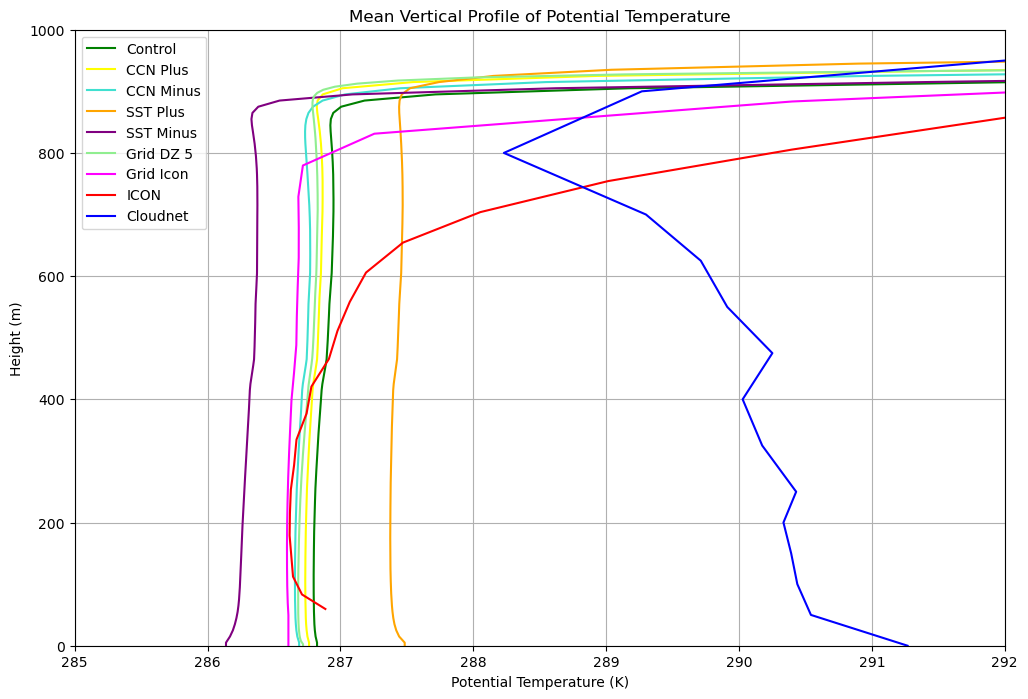

In [21]:
# Mittlere Profile der potentiellen Temperatur berechnen
def mean_profile(ds, var_name):
    return ds[var_name].mean(dim='time')

profiles = {
    'Control': mean_profile(controle_psds, 't'),
    'CCN Plus': mean_profile(ds_ccn_plus, 't'),
    'CCN Minus': mean_profile(ds_ccn_minus, 't'),
    'SST Plus': mean_profile(sstplus_psds, 't'),
    'SST Minus': mean_profile(sst_minus_psds, 't'),
    'Grid DZ 5': mean_profile(grid5_00_psds, 't'),
    'Grid Icon': mean_profile(grid_icon_00_psds, 't'),
    'ICON': mean_profile(ds_icon, 'theta_v'),
    'Cloudnet': mean_profile(ds_theta_v4, 'theta_l')
}

# Farben für die verschiedenen Läufe
colors = {
    'Control': "green",
    'CCN Plus': "yellow",
    'CCN Minus': "turquoise",
    'SST Plus': "orange",
    'SST Minus': "purple",
    'Grid DZ 5': "lightgreen",
    'Grid Icon': "magenta",
    'ICON': "red",
    'Cloudnet': "blue"
}

# Plotten der Profile
plt.figure(figsize=(12, 8))

for name, profile in profiles.items():
    if name=="ICON":
        height = ds_icon.isel(ncells=0)['z_mc']  
    elif 'height' in profile.coords:
        height = profile['height']
    else:
        height = profile['zt']
    
    plt.plot(profile.values, height, label=name, color=colors[name])

plt.xlabel('Potential Temperature (K)')
plt.ylabel('Height (m)')
plt.title('Mean Vertical Profile of Potential Temperature')
plt.legend()
plt.grid(True)
plt.ylim(0, 1000)
plt.xlim(285, 292)

plt.savefig(outputdir + "Mean_Vertical_Profile_Potential_Temperature_hr.png")
plt.show()